In [1]:
%matplotlib inline
from auto_reduce import *
import numpy as np

$ \dot{x} = f(x, \Theta) + g(x)u \\ y = Cx  \\
y = h(x, \Theta)$

In [2]:
# Post conservation law model
n = 2
nouts = 1 # Number of outputs
# Either
# sys.load_SBML_model('my_sbml_model.xml')

# OR write ODEs
#      x = ES, P
#      P = a, d, k, Etot, Stot

# parameter values
P = np.zeros(5)
P[0] = 10
P[1] = 10
P[2] = 0.1
P[3] = 1
P[4] = 100

params_values = P.copy()
timepoints_ode = np.linspace(0, 1500, 100) # timepoints for simulation

x_init = np.zeros(n) # Initial conditions

error_tol = 100
nstates_tol = 1
x, f, P = system.load_ODE_model(n, len(params_values))
params = P
f[0] = P[0]*(P[3] - x[0])*(P[4] - x[0] - x[1]) - P[1]*x[0] - P[2]*x[0]
f[1] = P[2]*x[0]
C = np.zeros((nouts,len(x)), dtype=int)
C[0][1] = 1
C = C.tolist()
sys = System(x, f, params = P, params_values = params_values, C = C, x_init = x_init)

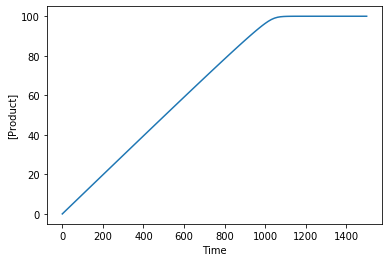

In [3]:
from auto_reduce.utils import get_ODE
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
import matplotlib.pyplot as plt
plt.plot(timepoints_ode, np.transpose(np.array(C)@sol))
plt.xlabel('Time')
plt.ylabel('[Product]')
plt.show()

In [4]:
from auto_reduce.utils import get_SSM
timepoints_ssm = np.linspace(0,100,10)
sys_ssm = get_SSM(sys, timepoints_ssm)
Ss = sys_ssm.compute_SSM() # len(timepoints) x len(params) x len(states)
out_Ss = []
for i in range(len(params)):
    out_Ss.append((np.array(C)@(Ss[:,i,:].T)))
out_Ss = np.reshape(np.array(out_Ss), (len(timepoints_ssm), len(params), nouts))

SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


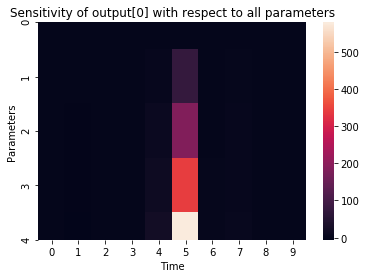

In [5]:
import seaborn as sn
for j in range(nouts):
    sn.heatmap(out_Ss[:,:,j].T)
    plt.xlabel('Time')
    plt.ylabel('Parameters')
    plt.title('Sensitivity of output[{0}] with respect to all parameters'.format(j))
    plt.show()

In [4]:
from auto_reduce.utils import reduce
timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 100)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)
results = sys_reduce.reduce_simple()

attempting reduced states index: [1]
Reduced set of variables is [x1]
f_hat =  [P2*x0]
Collapsed set of variables is [x0]
Multiple solutions obtained. Chooosing non-zero solution, check consistency. The solutions are  [(P0*P3 + P0*P4 - P0*x1 + P1 + P2 - sqrt(P0**2*P3**2 - 2*P0**2*P3*P4 + 2*P0**2*P3*x1 + P0**2*P4**2 - 2*P0**2*P4*x1 + P0**2*x1**2 + 2*P0*P1*P3 + 2*P0*P1*P4 - 2*P0*P1*x1 + 2*P0*P2*P3 + 2*P0*P2*P4 - 2*P0*P2*x1 + P1**2 + 2*P1*P2 + P2**2))/(2*P0), (P0*P3 + P0*P4 - P0*x1 + P1 + P2 + sqrt(P0**2*P3**2 - 2*P0**2*P3*P4 + 2*P0**2*P3*x1 + P0**2*P4**2 - 2*P0**2*P4*x1 + P0**2*x1**2 + 2*P0*P1*P3 + 2*P0*P1*P4 - 2*P0*P1*x1 + 2*P0*P2*P3 + 2*P0*P2*P4 - 2*P0*P2*x1 + P1**2 + 2*P1*P2 + P2**2))/(2*P0)]
Solved for x0 to get (P0*P3 + P0*P4 - P0*x1 + P1 + P2 - sqrt(P0**2*P3**2 - 2*P0**2*P3*P4 + 2*P0**2*P3*x1 + P0**2*P4**2 - 2*P0**2*P4*x1 + P0**2*x1**2 + 2*P0*P1*P3 + 2*P0*P1*P4 - 2*P0*P1*x1 + 2*P0*P2*P3 + 2*P0*P2*P4 - 2*P0*P2*x1 + P1**2 + 2*P1*P2 + P2**2))/(2*P0)
Substituting (P0*P3 + P0*P4 - P0*x1

C:\Users\apand\Anaconda3\lib\site-packages\scipy\linalg\_solvers.py:196: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  RuntimeWarning)
C:\Users\apand\Box\biocircuits\Ayush\synBio\autoReduce\auto_reduce\model_reduction.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  Se[j] = max_eig_P + 2*len(reduced_ssm.timepoints)*S_metric_max


Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [5]:
aa,bb = sys_reduce.solve_timescale_separation([x[1]])
# from sympy import solve, Eq
# collapse = solve(Eq(bb.f[0]), x[0])
# aa.f[0] = aa.f[0].subs(x[0], collapse)

attempting reduced states index: [1]
Reduced set of variables is [x1]
f_hat =  [P2*x0]
Collapsed set of variables is [x0]
Multiple solutions obtained. Chooosing non-zero solution, check consistency. The solutions are  [(P0*P3 + P0*P4 - P0*x1 + P1 + P2 - sqrt(P0**2*P3**2 - 2*P0**2*P3*P4 + 2*P0**2*P3*x1 + P0**2*P4**2 - 2*P0**2*P4*x1 + P0**2*x1**2 + 2*P0*P1*P3 + 2*P0*P1*P4 - 2*P0*P1*x1 + 2*P0*P2*P3 + 2*P0*P2*P4 - 2*P0*P2*x1 + P1**2 + 2*P1*P2 + P2**2))/(2*P0), (P0*P3 + P0*P4 - P0*x1 + P1 + P2 + sqrt(P0**2*P3**2 - 2*P0**2*P3*P4 + 2*P0**2*P3*x1 + P0**2*P4**2 - 2*P0**2*P4*x1 + P0**2*x1**2 + 2*P0*P1*P3 + 2*P0*P1*P4 - 2*P0*P1*x1 + 2*P0*P2*P3 + 2*P0*P2*P4 - 2*P0*P2*x1 + P1**2 + 2*P1*P2 + P2**2))/(2*P0)]
Solved for x0 to get (P0*P3 + P0*P4 - P0*x1 + P1 + P2 - sqrt(P0**2*P3**2 - 2*P0**2*P3*P4 + 2*P0**2*P3*x1 + P0**2*P4**2 - 2*P0**2*P4*x1 + P0**2*x1**2 + 2*P0*P1*P3 + 2*P0*P1*P4 - 2*P0*P1*x1 + 2*P0*P2*P3 + 2*P0*P2*P4 - 2*P0*P2*x1 + P1**2 + 2*P1*P2 + P2**2))/(2*P0)
Substituting (P0*P3 + P0*P4 - P0*x1

In [7]:
bb.f[0]

P0*(P3 - x0)*(P4 - x0) - P1*x0 - P2*x0

In [8]:
list(results.keys())[0].f[0]

P2*(P0*P3 + P0*P4 - P0*x1 + P1 + P2 - sqrt(P0**2*P3**2 - 2*P0**2*P3*P4 + 2*P0**2*P3*x1 + P0**2*P4**2 - 2*P0**2*P4*x1 + P0**2*x1**2 + 2*P0*P1*P3 + 2*P0*P1*P4 - 2*P0*P1*x1 + 2*P0*P2*P3 + 2*P0*P2*P4 - 2*P0*P2*x1 + P1**2 + 2*P1*P2 + P2**2))/(2*P0)

In [50]:
P = np.array([[-3.65375409e+46, -4.05648192e+30,  4.05648192e+30],
 [-4.05648192e+30, -9.00719925e+14,  9.00719925e+14],
 [ 4.05648192e+30,  9.00719925e+14, -9.00719925e+14]])
P11 = P[0:2, 0:2]
P12 = P[0:2, 2:4]
P21 = P[2:4, 0:2]
P22 = P[2:4, 2:4]
q11 = np.array(P11@T1 + P12)
q12 = np.array(P11@T2)
q21 = np.array(P21@T1 + P22)
q22 = np.array(P21@T2)
Q_s = np.zeros( (2+1, 2))
Q_s[0:2,0:1] = q11
Q_s[0:2,1:3] = q12
Q_s[2:4,0:1] = q21
Q_s[2:4,1:3] = q22

In [56]:
Q_s

array([[ 0.00000000e+00, -3.65375409e+46],
       [ 0.00000000e+00, -4.05648192e+30],
       [ 0.00000000e+00,  4.05648192e+30]])

In [ ]:
# Pre conservation law model
n = 4 # Number of states 
nouts = 1 # Number of outputs
# Either
# sys.load_SBML_model('my_sbml_model.xml')

# OR write ODEs
#      x = E, S, ES, P
#      P = a, d, k, Etot

# parameter values
P = np.zeros(4)
P[0] = 10
P[1] = 10
P[2] = 0.1
P[3] = 1
params_values = P.copy()
timepoints_ode = np.linspace(0, 100, 100) # timepoints for simulation

x_init = np.zeros(n) # Initial conditions
x_init[0] = 1
x_init[1] = 0.5

error_tol = 100
nstates_tol = 1
x, f, P = system.load_ODE_model(n, len(params_values))
params = P
# T1 and A1
f[0] = -P[0]*(P[3] - x[2])*x[1] + P[1]*x[2] + P[2]*x[2]
f[1] = -P[0]*(P[3] - x[2])*x[1] + P[1]*x[2]
f[2] = P[0]*(P[3] - x[2])*x[1] - (P[1] + P[2])*x[2]
f[3] = P[2]*x[2]

C = np.zeros((nouts,len(x)), dtype=int)
C[0][3] = 1
C = C.tolist()
sys = System(x, f, params = P, params_values = params_values, C = C, x_init = x_init)